<a href="https://colab.research.google.com/github/parkmicheal1114/ADP-Statistics/blob/main/%ED%9A%8C%EA%B7%80%EC%99%80%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!!pip install dmba #dmba 패키지

['Collecting dmba',
 '  Downloading dmba-0.2.4-py3-none-any.whl.metadata (1.9 kB)',
 'Requirement already satisfied: graphviz in /usr/local/lib/python3.10/dist-packages (from dmba) (0.20.3)',
 'Requirement already satisfied: matplotlib in /usr/local/lib/python3.10/dist-packages (from dmba) (3.7.1)',
 'Requirement already satisfied: numpy in /usr/local/lib/python3.10/dist-packages (from dmba) (1.25.2)',
 'Requirement already satisfied: pandas in /usr/local/lib/python3.10/dist-packages (from dmba) (2.0.3)',
 'Requirement already satisfied: scikit-learn in /usr/local/lib/python3.10/dist-packages (from dmba) (1.3.2)',
 'Requirement already satisfied: scipy in /usr/local/lib/python3.10/dist-packages (from dmba) (1.13.1)',
 'Requirement already satisfied: contourpy>=1.0.1 in /usr/local/lib/python3.10/dist-packages (from matplotlib->dmba) (1.2.1)',
 'Requirement already satisfied: cycler>=0.10 in /usr/local/lib/python3.10/dist-packages (from matplotlib->dmba) (0.12.1)',
 'Requirement already 

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st
import statsmodels.api as sm

# 단순 선형 회귀

- 상관 관계가 전체적인 관련 강도를 측정 하는 것이라면 , 회귀는 관계 자체를 정량화 하는 방법.

## 회귀식

In [3]:
  # 4.1.1 예제
data_url = 'https://raw.githubusercontent.com/parkmicheal1114/practical-statistics-for-data-scientists/master/data/LungDisease.csv'

In [4]:
# Data Load
df = pd.read_csv(data_url)
df.head()

,PEFR,Exposure
0,390,0
1,410,0
2,430,0
3,460,0
4,420,1


In [5]:
# 사이킷런 Linear Regression
from sklearn.linear_model import LinearRegression

feature = df[['Exposure']]
target = df[['PEFR']]

lr_reg = LinearRegression()
lr_reg.fit(feature , target)

print('Intercept : ' , lr_reg.intercept_)
print('Coef. : ' , lr_reg.coef_[0] )

Intercept :  [424.58280657]
Coef. :  [-4.18457649]


In [6]:
# 단순 선형 회귀식
y = lr_reg.intercept_ + df['Exposure'] * lr_reg.coef_[0]

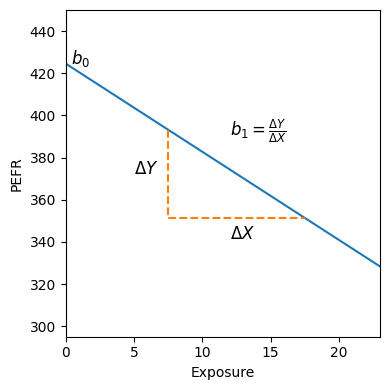

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(4, 4))
ax.set_xlim(0, 23)
ax.set_ylim(295, 450)
ax.set_xlabel('Exposure')
ax.set_ylabel('PEFR')
ax.plot((0, 23), lr_reg.predict(pd.DataFrame({'Exposure': [0, 23]})))
ax.text(0.4, lr_reg.intercept_, r'$b_0$', size='larger')

x = pd.DataFrame({'Exposure': [7.5,17.5]})
y = lr_reg.predict(x)
ax.plot((7.5, 7.5, 17.5), (y[0], y[1], y[1]), '--')
ax.text(5, np.mean(y), r'$\Delta Y$', size='larger')
ax.text(12, y[1] - 10, r'$\Delta X$', size='larger')
ax.text(12, 390, r'$b_1 = \frac{\Delta Y}{\Delta X}$', size='larger')

plt.tight_layout()
plt.show()

- 두 변수는 감소 하는 방향으로 기울기가 생성 되어있기 때문에 , x가 감소 하는 만큼 y값이 감소 하는 비율이 기울기가 된다. 반대 모양이라면 반대로 해석 하면 됨..

- 주의
 - 사이킷런의 LInearRegression은 SVD 알고리즘을 사용 한다.( 핸즈온머신러닝 4장 참조 )
 - 통계적 기법인 OLS를 활용 하기 위해서는 Statsmodel의 OLS 로 모델을 훈련 시켜야 한다.

## 예측값과 잔차

 - 잔차 : 당연한 얘기 겠지만 , 모든 데이터가 정확히 회귀선을 따르지 않는다.이때 예측값과 관측값의 차이를 잔차(residual) 이라고 한다.
 - 회귀식에서는 오차항을 포함한다.



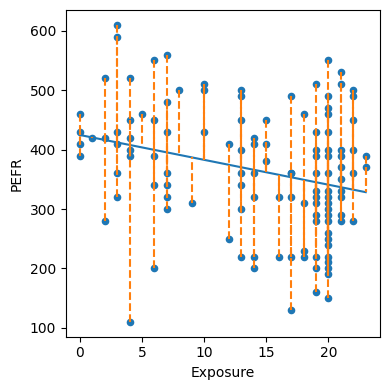

In [8]:
pred = lr_reg.predict(feature)
res = target - pred

# 잔차에 대한 시각화
ax = df.plot.scatter(x='Exposure', y='PEFR', figsize=(4, 4))
ax.plot(df.Exposure, pred)
for x, yactual, yfitted in zip(df.Exposure, df.PEFR, pred.ravel()):
    ax.plot((x, x), (yactual, yfitted), '--', color='C1')

plt.tight_layout()
plt.show()

## 최소제곱

- 회귀선 => 잔차들의 제곱한 값들의 합(RSS)을 최소화 하는 선을 의미 한다

- 이렇게 RSS 를 최소화 하는 회귀 방법을 OLS 라고 한다.

- OLS 의 장점은 속도에 있지만 , 단점으로는 이상치에 민감하다. 이는 평균을 기대값으로 사용 하고 있기 때문이다.

## 예측 대 설명

 - 전통적으로 회귀는 데이터 간의 관계를 이해 하고 그것을 설명 하는데 목적을 둔다.
 - 즉 회귀 기울기를 추정 함으로써 , 변수간의 상관관계를 이해 하고 , 설명하는데 초점이 있었음.

 - 빅데이터로 넘어오면서 설명 보다는 예측 모델을 구성 하는데 무게가 실리고 있음.

 - 끝으로 회귀 방정식이 인과관계를 정확히 증명하는 것이 아님을 알고 인식 해야 함.

## keyword
 - 절편 : 변수 X의 크기가 0 일때 예측값
 - 회귀계수 : 회귀선의 기울기 ( 유의어 : 모수추정값 , 가중치)
 - 잔차 : 관측값과 예측값의 차이
 - 최소제곱 : 잔차의 제곱값을 최소화 하는 방향으로 회귀 모델을 훈련 하는 방법 (OLS)


# 다중 선형 회귀

 $ Y = b_0 + b_1X +b_2X + ... + e $

- 단순 회귀 와는 달리 여러 feature 들로 구성 된다.


## 예제..

In [9]:
# 킹카운티예제
house = pd.read_csv('https://raw.githubusercontent.com/parkmicheal1114/practical-statistics-for-data-scientists/master/data/house_sales.csv' , sep = '\t')
house.head()

,DocumentDate,SalePrice,PropertyID,PropertyType,ym,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,SqFtLot,...,Bathrooms,Bedrooms,BldgGrade,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction
1,2014-09-16,280000,1000102,Multiplex,2014-09-01,405100,0.930836,300805.0,2,9373,...,3.00,6,7,1991,0,0,70000,229000,98002,False
2,2006-06-16,1000000,1200013,Single Family,2006-06-01,404400,0.929228,1076162.0,1,20156,...,3.75,4,10,2005,0,0,203000,590000,98166,True
3,2007-01-29,745000,1200019,Single Family,2007-01-01,425600,0.977941,761805.0,1,26036,...,1.75,4,8,1947,0,0,183000,275000,98166,False
4,2008-02-25,425000,2800016,Single Family,2008-02-01,418400,0.961397,442065.0,1,8618,...,3.75,5,7,1966,0,0,104000,229000,98168,False
5,2013-03-29,240000,2800024,Single Family,2013-03-01,351600,0.807904,297065.0,1,8620,...,1.75,4,7,1948,0,0,104000,205000,98168,False


In [10]:
feature = house[['SqFtTotLiving', 'SqFtLot', 'Bathrooms',
              'Bedrooms', 'BldgGrade']]
target = house['AdjSalePrice']

lr_reg = LinearRegression()
lr_reg.fit(feature , target)

print('Intercept : ' , lr_reg.intercept_)
print('Coef ')
for name , coef in zip(feature.columns , lr_reg.coef_):
  print(f'{name} : {coef : .4f}')

Intercept :  -521871.36818828376
Coef 
SqFtTotLiving :  228.8306
SqFtLot : -0.0605
Bathrooms : -19442.8404
Bedrooms : -47769.9552
BldgGrade :  106106.9631


- 회귀 계수에 대한 설명
 - 다른 모든 변수를 고정 시킨다고 가정 했을 때 , SqFtTotLiving 이 1 만큼 커지면 , 주택 가격은 228$ 상승 한다고 얘기 할 수 있다.
 - 이런 이유로 선형 회귀 에서는 데이터 스케일링이 거의 반드시 동반 되어야 한다.

In [11]:
ols_model = sm.OLS(target , sm.add_constant(feature) ).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdjSalePrice   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     5338.
Date:                Mon, 29 Jul 2024   Prob (F-statistic):               0.00
Time:                        00:34:55   Log-Likelihood:            -3.1517e+05
No. Observations:               22687   AIC:                         6.304e+05
Df Residuals:                   22681   BIC:                         6.304e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5.219e+05   1.57e+04    -33.342      0.000   -5.53e+05   -4.91e+05
SqFtTotLiving   228.8306      3.899     58.694      0.000     221.189     236.472
SqFtLot          -0.0605      0.061     -0.988      0.323      -0.180       0.059
Bathrooms     -1.944e+04   3625.388     -5.363      0.000   -2.65e+04   -1.23e+04
Bedrooms      -4.777e+04   2489.732    -19.187      0.000   -5.27e+04   -4.29e+04
BldgGrade      1.061e+05   2396.445     44.277      0.000    1.01e+05    1.11e+05
==============================================================================
Omnibus:                    29676.557   Durbin-Watson:                   1.247
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         19390738.346
Skew:                           6.889   Prob(JB):                         0.00
Kurtosis:                     145.559   Cond. No.                     2.86e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.86e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- statsmodel.OLS 적용시 주의: target => endog .. add_const()를 추가 함으로서 상수함 추가됨.

- OLS summary 해석
  - $ R^2 $ : 결정계수라고도 하는데 , 모델이 데이터를 얼마나 잘 설명 하고 있는지 혹은 적합한지에 대한 평가 지표. $Adj. R^2$ 는 자유도가 반영된 결정계수로 다중변수 추가에 대한 패널티가 감안된 평가지표.
  - t 통계량, p : 예측변수의 통계적 유의미성 평가하는 지표 이다. 일반적으로 유의지수는 0.05를 기준으로 삼는다.
  - F 통계량, P : 모델의 통계적 유의미선을 평가하는 지표. 다시 얘기 하면 회귀식이 통계적으로 유의미하다고 볼 수 있는지를 평가 할 수 있다.
  - Durbin-Watson : 오차항의 독립성을 검정. 값은 0 ~ 4 까지의 범위를 가지며 , 2를 기준으로 한다. 일반적으로 1.5~2.5 사이에 있다면 자기 상관이 문제 되지 않는다고 본다.
  - Jarque-Bera : 오차항의 정규성 검정.(자가 상관 참조)
  - Omnibus : 오차항의 정규성 검정.(모델의 유의성 판단)



## 교차타당성검사
 - K-Fold cross validation  

## 모형 선택 및 단계적 회귀

   - 모든 것이 동일한 조건에서는 단순한 모델로 부터 시작 한다.
   - 변수가 추가 될수록 $R^2$ 가 증가 하기 때문에 , 추가 하는 변수들은 모델 선택에 크게 도움이 되지 않는다. 이럴 경우 $Adj.R^2$ 를 확인 한다.

   - AIC/BIC : 모형의 적합도와 적합도의 균형을 잡는 지표. 다시 얘기 하면 변수가 추가 되면 결정 계수가 상승 할 수 있는데, 이때 추가되는 특성의 수에 패널티를 부여 함으로서 의미 없는 변수가 성능에 반영 되지 않도록 한다.  

In [12]:
feature = house[['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms',
              'BldgGrade', 'PropertyType', 'NbrLivingUnits',
              'SqFtFinBasement', 'YrBuilt', 'YrRenovated',
              'NewConstruction']]

# 데이터 변환및 처리
feature_ohe  = pd.get_dummies(feature , drop_first= True , dtype= 'int')
feature_ohe['NewConstruction'] = [1 if d else 0 for d in feature_ohe['NewConstruction']]

# OLS
house_model = sm.OLS(target , sm.add_constant(feature_ohe)).fit()
house_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdjSalePrice   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     2771.
Date:                Mon, 29 Jul 2024   Prob (F-statistic):               0.00
Time:                        00:34:55   Log-Likelihood:            -3.1375e+05
No. Observations:               22687   AIC:                         6.275e+05
Df Residuals:                   22674   BIC:                         6.276e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       6.182e+06   1.55e+05     39.902      0.000    5.88e+06    6.49e+06
SqFtTotLiving                198.6364      4.234     46.920      0.000     190.338     206.934
SqFtLot                        0.0771      0.058      1.330      0.184      -0.037       0.191
Bathrooms                   4.286e+04   3808.114     11.255      0.000    3.54e+04    5.03e+04
Bedrooms                   -5.187e+04   2396.904    -21.638      0.000   -5.66e+04   -4.72e+04
BldgGrade                   1.373e+05   2441.242     56.228      0.000    1.32e+05    1.42e+05
NbrLivingUnits              5723.8438   1.76e+04      0.326      0.744   -2.87e+04    4.01e+04
SqFtFinBasement                7.0611      4.627      1.526      0.127      -2.009      16.131
YrBuilt                    -3574.2210     77.228    -46.282      0.000   -3725.593   -3422.849
YrRenovated                   -2.5311      3.924     -0.645      0.519     -10.222       5.160
NewConstruction            -2489.1122   5936.692     -0.419      0.675   -1.41e+04    9147.211
PropertyType_Single Family  2.997e+04   2.61e+04      1.149      0.251   -2.12e+04    8.11e+04
PropertyType_Townhouse      9.286e+04    2.7e+04      3.438      0.001    3.99e+04    1.46e+05
==============================================================================
Omnibus:                    31006.128   Durbin-Watson:                   1.393
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         26251977.078
Skew:                           7.427   Prob(JB):                         0.00
Kurtosis:                     168.984   Cond. No.                     2.98e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.98e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
print('AIC : ', house_model.aic)
print('BIC : ', house_model.bic)

AIC :  627528.3638290131
BIC :  627632.7479445917


- AIC , BIC 를 활용 해서 적절한 변수를 찾아서 모델에 적용할 수 있다.
- 대표적인 통계적인 방법으로 전진 선택 , 후진 제거 , 단계적 선택 방법등이 있다.

In [14]:
# dmba 모듈을 사용 하는 방법.
from dmba import stepwise_selection , AIC_score

def train_model(var):
  if len(var) == 0:
    return None
  model = LinearRegression()
  model.fit(feature_ohe[var] , target)
  return model

def score_model(model , var):
  if len(var) == 0 :
    return AIC_score(target , [target.mean()] * len(target) , model ,df = 1)
  return AIC_score(target , model.predict(feature_ohe[var]) , model)

best_model , best_variables = stepwise_selection(feature_ohe.columns , train_model , score_model , verbose = True)

Colab environment detected.
Variables: SqFtTotLiving, SqFtLot, Bathrooms, Bedrooms, BldgGrade, NbrLivingUnits, SqFtFinBasement, YrBuilt, YrRenovated, NewConstruction, PropertyType_Single Family, PropertyType_Townhouse
Start: score=647988.32, constant
Step: score=633013.35, add SqFtTotLiving
Step: score=630793.74, add BldgGrade
Step: score=628230.29, add YrBuilt
Step: score=627784.16, add Bedrooms
Step: score=627602.21, add Bathrooms
Step: score=627525.65, add PropertyType_Townhouse
Step: score=627525.08, add SqFtFinBasement
Step: score=627524.98, add PropertyType_Single Family
Step: score=627524.98, unchanged None


In [15]:
print(f'intercept : {best_model.intercept_ :.3f}')
print('Coef' )
for name , coef in zip(best_variables , best_model.coef_):
  print(f'{name} : {coef}')

intercept : 6178645.017
Coef
SqFtTotLiving : 199.2775530420188
BldgGrade : 137159.56022619782
YrBuilt : -3565.4249392492984
Bedrooms : -51947.38367361323
Bathrooms : 42396.16452771774
PropertyType_Townhouse : 84479.16203300416
SqFtFinBasement : 7.046974967553979
PropertyType_Single Family : 22912.055187017646


In [16]:
from dmba import forward_selection , backward_elimination

best_model_forward , best_variables_forward = forward_selection(feature_ohe.columns , train_model , score_model , verbose = True)

Variables: SqFtTotLiving, SqFtLot, Bathrooms, Bedrooms, BldgGrade, NbrLivingUnits, SqFtFinBasement, YrBuilt, YrRenovated, NewConstruction, PropertyType_Single Family, PropertyType_Townhouse
Start: score=647988.32, constant
Step: score=633013.35, add SqFtTotLiving
Step: score=630793.74, add BldgGrade
Step: score=628230.29, add YrBuilt
Step: score=627784.16, add Bedrooms
Step: score=627602.21, add Bathrooms
Step: score=627525.65, add PropertyType_Townhouse
Step: score=627525.08, add SqFtFinBasement
Step: score=627524.98, add PropertyType_Single Family
Step: score=627524.98, add None


In [17]:
best_variables_forward

['SqFtTotLiving',
 'BldgGrade',
 'YrBuilt',
 'Bedrooms',
 'Bathrooms',
 'PropertyType_Townhouse',
 'SqFtFinBasement',
 'PropertyType_Single Family']

In [18]:
best_model_back , best_variables_back = backward_elimination(feature_ohe.columns , train_model , score_model , verbose = True)

Variables: SqFtTotLiving, SqFtLot, Bathrooms, Bedrooms, BldgGrade, NbrLivingUnits, SqFtFinBasement, YrBuilt, YrRenovated, NewConstruction, PropertyType_Single Family, PropertyType_Townhouse
Start: score=627530.36
Step: score=627528.47, remove NbrLivingUnits
Step: score=627526.65, remove NewConstruction
Step: score=627525.08, remove YrRenovated
Step: score=627524.98, remove SqFtLot
Step: score=627524.98, remove None


In [19]:
best_variables_back

['SqFtTotLiving',
 'Bathrooms',
 'Bedrooms',
 'BldgGrade',
 'SqFtFinBasement',
 'YrBuilt',
 'PropertyType_Single Family',
 'PropertyType_Townhouse']

## 가중 회귀

In [20]:
house['Year'] = [int(date.split('-')[0]) for date in house.DocumentDate]
house['Weight'] = house['Year'] - 2005

- 가중 회귀를 진행 하기에 앞서 , Year를 기준으로 정보의 최신성을 가중치로 사용하 도록 변환 해 보자.

In [21]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms',
              'Bedrooms', 'BldgGrade']

house_wt = LinearRegression()
house_wt.fit(house[predictors], target , sample_weight = house.Weight)

house_lm = LinearRegression()
house_lm.fit(house[predictors], target)


LinearRegression()

In [22]:
# 가중 회귀와 일반 회귀의 회귀 계수 비교
pd.DataFrame(
    index = predictors,
    data = {'house_lm': house_lm.coef_,
            'house_wt': house_wt.coef_}
)

,house_lm,house_wt
SqFtTotLiving,228.830604,245.024089
SqFtLot,-0.060467,-0.292415
Bathrooms,-19442.840398,-26085.970109
Bedrooms,-47769.955185,-53608.876436
BldgGrade,106106.963079,115242.434726


- 두 모델의 회귀 계수를 보면 조금 차이가 나는 것을 확인 할 수 있다.

## Keyword

- RMSE : 회귀 평가 지표중 하나.
- $R^2$ : 결정 계수 , 모델의 설명력 , 모델에 의해서 설명되 분산의 비율
- t 통계량 : 모델에서 변수의 중요도를 비교하는 기준.
- RSE(잔차표준오차) : 자유도에 의해서 보정된 값(?)

# 회귀를 이용한 예측

- 데이터 과학 에서 회귀는 예측이 목적.
- 전통적 통계 에서 회귀는 설명을 위한 모델링.

## 외삽의 위험
 - 회귀 모형을 데이터 범위를 초과하면서 까지 외삽에 사용 해서는 안된다.
 - 훈련 범위 밖의 데이터에 대한 예측을 위한 정보가 없기 때문에 큰오차가 발생 할 가능성이 높다.


## 예측 구간과 신뢰 구간
  - 예측 구간 : 하나의 값에 대해서 불확실성과 관련.
  - 신뢰 구간 : 여러 값에서 계산된 평균이나 다른 통계량과 관련.
    - 회귀 계수 주변의 불확실성.

  - 일반적으로 데이터과학에서는 특정 예측에 대한 관심이 있으므로 예측 구간이 더 적절할 수 있다. 예측구간을 사용 해야 하는데 신뢰 구간을 사용 하게 되면 , 예측값의 불확실성이 지나치게 낮은 것으로 나타날 수 있다.

### kewowrd

- 외삽 ; 모델링에 사용된 데이터 범위를 벗어난 부분까지 모델을 확장 하는것..

# 회귀에서의 요인 변수
  - 범주형 변수

### keyword
  -